# 1) Prepare a classification model using Naive Bayes for salary data 

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


# Import Library

In [42]:
salary_train=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Naive Bayes\\SalaryData_Train.csv")
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
salary_test=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Naive Bayes\\SalaryData_Test.csv")
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [44]:
salary_test.shape , salary_train.shape

((15060, 14), (30161, 14))

In [45]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [46]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [47]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [48]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

# Visualization 

<AxesSubplot:>

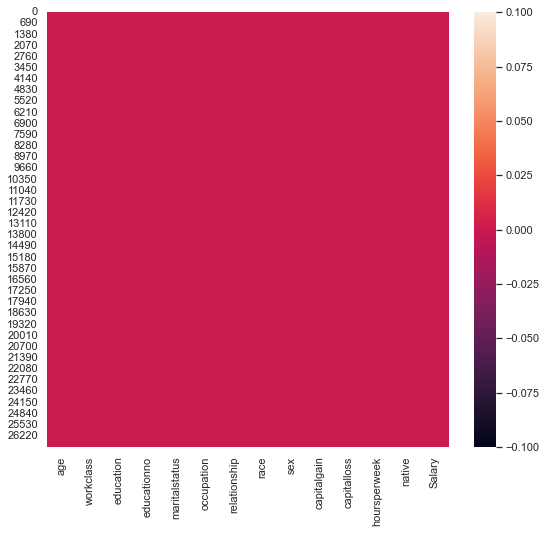

In [117]:
import seaborn as sns
sns.heatmap(salary_train.isnull())

<AxesSubplot:>

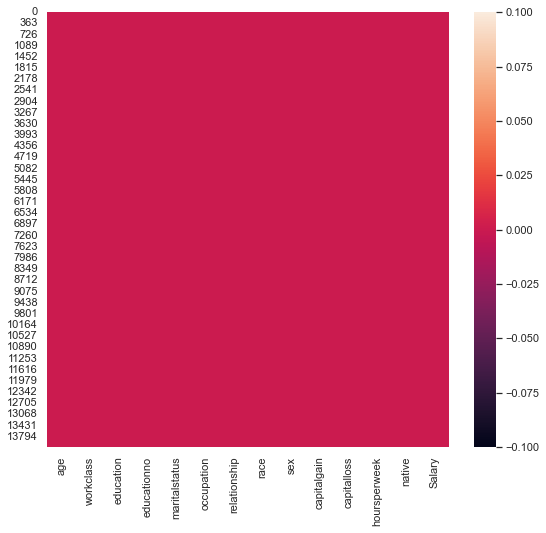

In [118]:
import seaborn as sns
sns.heatmap(salary_test.isnull())

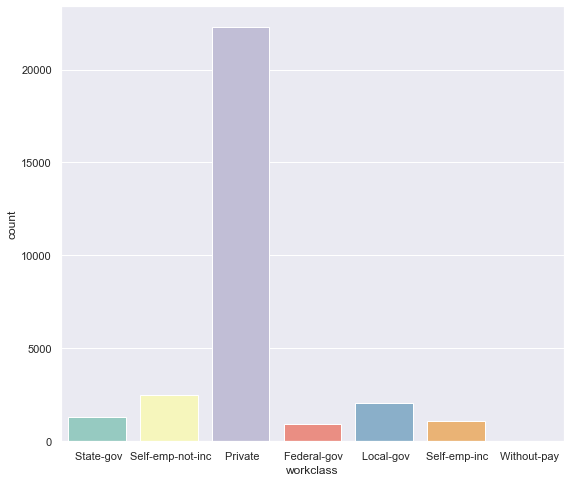

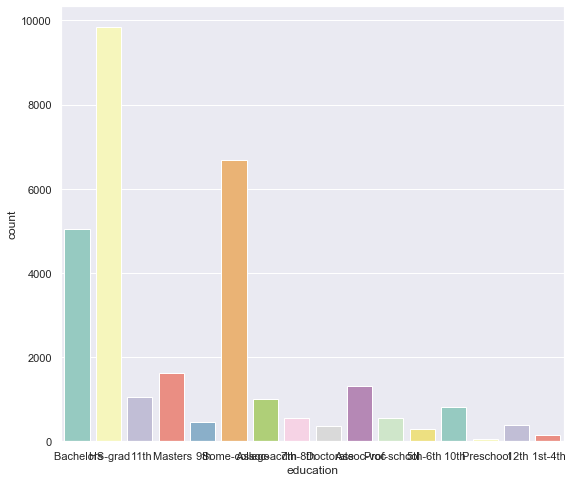

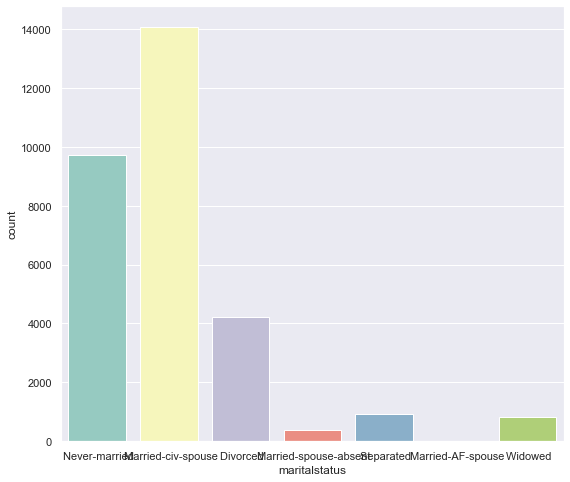

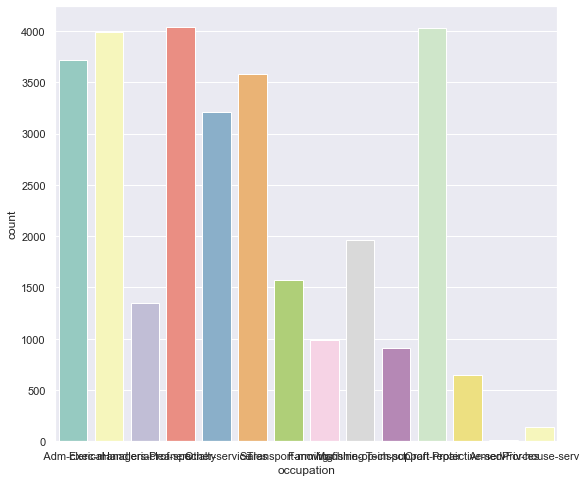

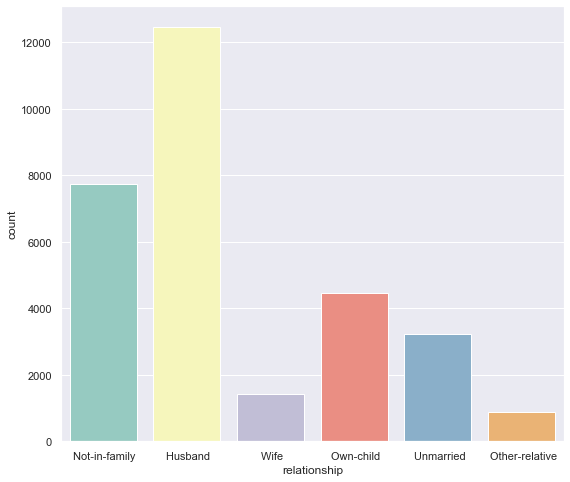

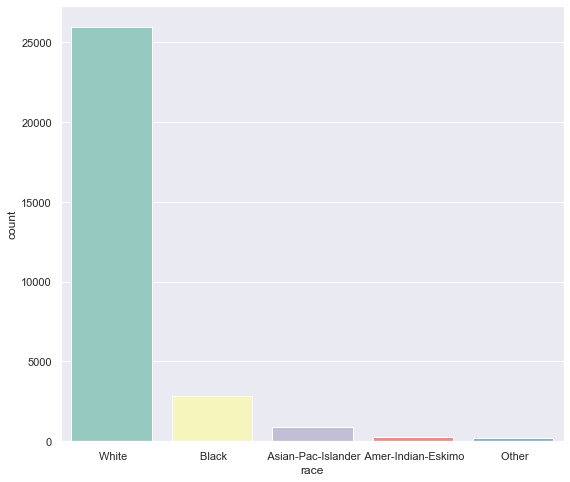

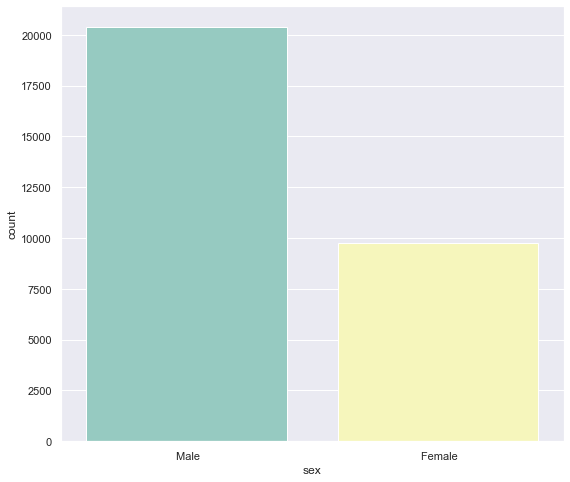

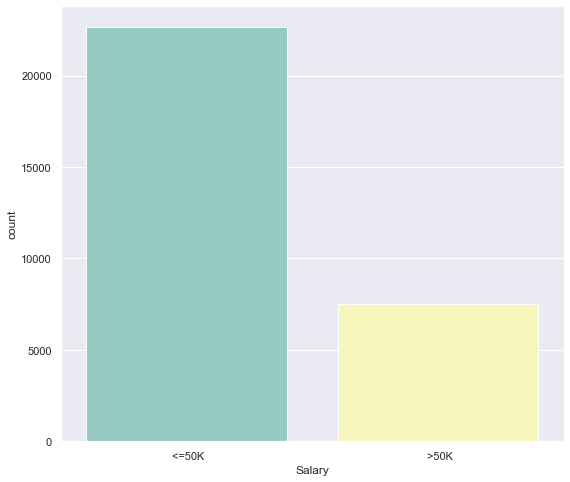

In [51]:
# countplot for all categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = salary_train, palette = 'Set3');

# Label Encoding For Train Data .

In [52]:
for col in salary_train.columns:
    if salary_train[col].dtypes==object:
           salary_train[col]=LabelEncoder().fit_transform(salary_train[col])
    else :
        pass 

In [53]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


# Label Encoding for test Data 

In [54]:
for col in salary_test.columns:
    if salary_test[col].dtypes==object:
           salary_test[col]=LabelEncoder().fit_transform(salary_test[col])
    else :
        pass 

In [55]:
salary_test.shape

(15060, 14)

In [56]:
salary_train.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [57]:
salary_test.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

# Check for duplicated records in train data 

In [58]:

salary_train.loc[salary_train.duplicated(keep='first'), :]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,2,9,13,2,3,0,4,1,0,0,40,37,1
364,27,2,9,13,4,2,1,4,1,0,0,50,37,0
518,24,2,11,9,4,5,4,2,0,0,0,40,37,0
525,24,2,11,9,4,2,3,4,1,0,0,40,37,0
619,33,2,9,13,2,3,0,4,1,0,0,40,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,2,11,9,2,2,0,4,1,0,0,40,37,0
30118,20,2,11,9,4,6,3,4,1,0,0,40,37,0
30132,22,2,15,10,4,0,3,4,1,0,0,40,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1


# Drop duplicated records from train data 

In [59]:
salary_train.drop_duplicates(keep='first',inplace=True)

In [60]:
salary_train=salary_train.reset_index()
salary_train

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [61]:
salary_train=salary_train.drop(['index'],axis=1)


In [62]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,58,2,11,9,6,0,4,4,0,0,0,40,37,0


# Check duplicated records in test data 

In [63]:
salary_test.loc[salary_test.duplicated(keep='first'),:]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,2,11,9,0,7,1,4,0,0,0,40,37,0
601,32,2,11,9,2,11,0,4,1,0,0,40,37,0
681,40,2,11,9,2,2,0,4,1,0,0,40,37,0
799,24,2,9,13,4,9,1,4,1,0,0,35,37,0
1044,44,2,14,15,2,9,0,4,1,99999,0,60,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,2,11,9,2,2,0,4,1,0,0,40,37,0
15044,22,2,15,10,4,2,3,4,1,0,0,40,37,0
15049,32,2,11,9,2,5,0,4,1,0,0,40,37,0
15052,31,2,11,9,2,2,0,4,1,0,0,40,37,0


# Drop duplicated records in test data 

In [64]:
salary_test=salary_test.drop_duplicates(keep='first')

In [65]:
salary_test.shape

(14130, 14)

In [66]:
salary_test=salary_test.reset_index()

In [67]:
salary_test

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
14126,15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
14127,15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
14128,15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [68]:
salary_test=salary_test.drop(['index'],axis=1)

In [69]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37,0
14126,39,2,9,13,0,9,1,4,0,0,0,36,37,0
14127,38,2,9,13,2,9,0,4,1,0,0,50,37,0
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Test-Train-Split

In [70]:
x_train=salary_train.iloc[:,0:13]
y_train=salary_train.iloc[:,13]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37
26899,22,2,15,10,4,10,1,4,1,0,0,40,37
26900,27,2,7,12,2,12,5,4,0,0,0,38,37
26901,58,2,11,9,6,0,4,4,0,0,0,40,37


In [71]:
x_test=salary_test.iloc[:,0:13]
y_test=salary_test.iloc[:,13]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37
14126,39,2,9,13,0,9,1,4,0,0,0,36,37
14127,38,2,9,13,2,9,0,4,1,0,0,50,37
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37


# Building Multinomial Naive Bays Model
 

In [110]:
from sklearn.naive_bayes import MultinomialNB as MNB

model=MNB()
model.fit(x_train,y_train)

MultinomialNB()

# check the model accuracy using train data 

In [111]:
y_predict=model.predict(x_train)

In [112]:
print("Training Accuracy",np.mean(y_predict==y_train))

Training Accuracy 0.7683158012117608


# check the model accuracy using test data 

In [116]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0])

In [114]:
print("Testing Accuracy",np.mean(y_predict==y_test))

Testing Accuracy 0.7733899504600141


# Building Gaussian Naive Bayes Model


In [79]:
from sklearn.naive_bayes import GaussianNB as GNB

In [80]:
model_gaussian=GNB()


In [81]:
model_gaussian.fit(x_train,y_train)

GaussianNB()

In [82]:
y_predict=model_gaussian.predict(x_train)

In [84]:
print("Train Accuracy",np.mean(y_predict==y_train))

Train Accuracy 0.7933687692822362


In [86]:
y_predict=model_gaussian.predict(x_test)

In [87]:
print("Test Accuracy",np.mean(y_predict==y_test))

Test Accuracy 0.7951875442321302


# Compare train and test accuracy
# The training-set accuracy score is 0.7933687692822362 while the test-set accuracy to be 0.7951875442321302
# These two values are quite comparable. So, there is no sign of overfitting

# END